In [2]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.visualization import *
from math import sqrt, pi

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-06-02 14:01:23,579: Credentials are already in use. The existing account in the session will be replaced.


## Building the CNOT Identity

## Quick Exercises 1

### 1. What would be the resulting state of the control qubit (q0) if the target qubit (q1) was in the state |0⟩? (as shown in the circuit below)? Use Qiskit to check your answer. 

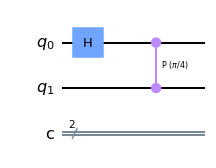

In [10]:
qCirc11 = QuantumCircuit(2, 2)
qCirc11.h(0)
qCirc11.cp(pi/4, 0, 1)
qCirc11.draw("mpl")

In [11]:
from qiskit_textbook.tools import array_to_latex
statevectorSim = Aer.get_backend('statevector_simulator')
job11 = execute(qCirc11, backend = statevectorSim).result()
state11 = job11.get_statevector()
array_to_latex(state11, pretext="\\text{Statevector} = ", precision=1)

<IPython.core.display.Math object>

### As obvious from the result above, the Control-T gate does not affect the $ |+ \rangle $ state.

C:\Users\lenovo\anaconda3\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


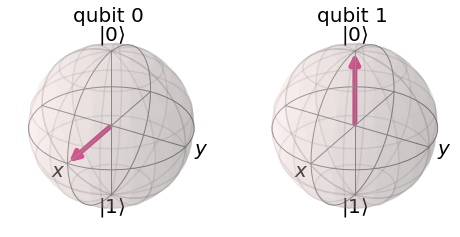

In [12]:
plot_bloch_multivector(state11)

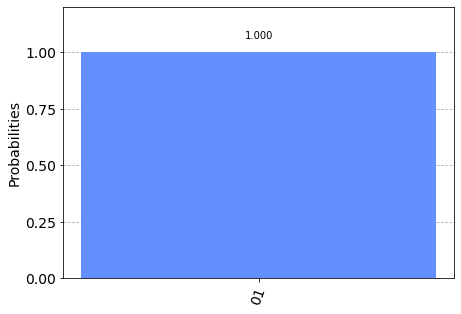

In [13]:
qCirc11.measure([0, 1], [0, 1])
simulator = Aer.get_backend('qasm_simulator')
counts11 = execute(qCirc11, backend = statevectorSim).result().get_counts()
plot_histogram(counts11)

### 2. What would happen to the control qubit (q0) if the target qubit (q1) was in the state |1⟩, and the circuit used a controlled-Sdg gate instead of the controlled-T (as shown in the circuit below)? 

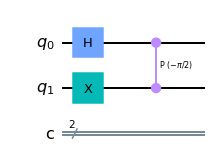

In [14]:
qCirc12 = QuantumCircuit(2, 2)
qCirc12.h(0)
qCirc12.x(1)
qCirc12.cp(-pi/2, 0, 1)
qCirc12.draw("mpl")

In [15]:
job12 = execute(qCirc12, backend = statevectorSim).result()
state12 = job12.get_statevector()
array_to_latex(state12, pretext="\\text{Statevector} = ", precision=1)

<IPython.core.display.Math object>

### From this result, we can see that that the $q_0$ state is rotated by $ -\pi / 2 $ about the Z-axis and now faces the negative-Y axis.

C:\Users\lenovo\anaconda3\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


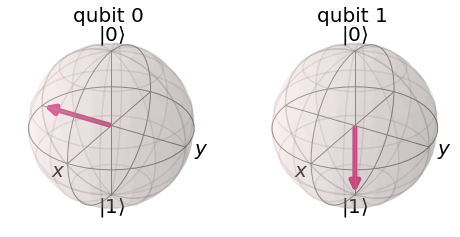

In [16]:
plot_bloch_multivector(state12)

### 3. What would happen to the control qubit (q0) if it was in the state |1⟩ instead of the state |+⟩ before application of the controlled-T (as shown in the circuit below)? 

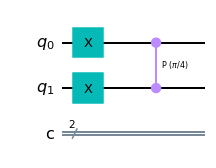

In [17]:
qCirc13 = QuantumCircuit(2, 2)
qCirc13.x([0,1])
qCirc13.cp(pi/4, 0, 1)
qCirc13.draw('mpl')

In [18]:
job13 = execute(qCirc13, backend = statevectorSim).result()
state13 = job13.get_statevector()
array_to_latex(state13, pretext="\\text{Statevector} = ", precision=1)

<IPython.core.display.Math object>

C:\Users\lenovo\anaconda3\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


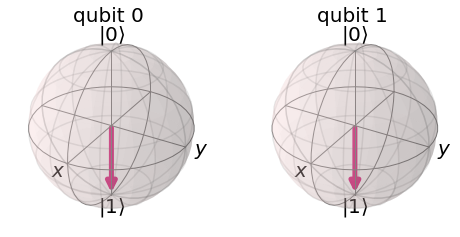

In [20]:
plot_bloch_multivector(state13)

### From this last case, the $ q_0 $ state was left unchanged. In fact both of the states were unchanged because they were both in the $ | 1 \rangle $ before and after the computation.